In [1]:
import os
import sys
import pandas as pd
import numpy as np

In [2]:
daily_data = pd.read_csv('data/daily.csv')
govt_measures = pd.read_excel('data/acaps_covid19_government_measures_dataset.xlsx', sheet_name='Database')

In [3]:
# Convert date to datetime object 
daily_data['date'] = pd.to_datetime(daily_data['date'], format='%Y%m%d')

In [4]:
daily_data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2020-07-24,56,4092928,45745166,3409.0,59670.0,289355.0,10288.0,13182.0,2712.0,...,2020-07-24T00:00:00Z,49841503,49838094,49838094,1178,3026,854645,75193,929838,12df42387588e4187c573031bd050ea724720a82
1,2020-07-23,56,4017735,44890521,3179.0,59885.0,286329.0,10466.0,12933.0,2472.0,...,2020-07-23T00:00:00Z,48911435,48908256,48908256,1039,2500,753372,71027,824399,c7d29139144a768dd70fb305be3246f8c5b25a42
2,2020-07-22,56,3946708,44137149,3051.0,59675.0,283829.0,10457.0,12790.0,2440.0,...,2020-07-22T00:00:00Z,48086908,48083857,48083857,1117,2248,726352,69150,795502,c28c2ce1af7dcb4a6dfc783c222acb7387b19277
3,2020-07-21,56,3877558,43410797,3197.0,59362.0,281581.0,6711.0,12629.0,2414.0,...,2020-07-21T00:00:00Z,47291552,47288355,47288355,1038,2551,686606,63642,750248,b315275d3d2251da5af96422594a53d6d0508aad
4,2020-07-20,56,3813916,42724191,3003.0,58371.0,279030.0,6558.0,12475.0,2403.0,...,2020-07-20T00:00:00Z,46541110,46538107,46538107,362,1647,654044,56971,711015,6223e4e1a7003f68d8bd1f30742ea4d8e283b834


In [5]:
govt_measures.head()

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN


In [6]:
# Filter only for United States
govt_measures = govt_measures[govt_measures['COUNTRY'] == 'United States of America']

In [7]:
daily_data.merge(govt_measures, left_on='date', right_on='DATE_IMPLEMENTED', how='left')

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,2020-07-24,56,4092928,45745166,3409.0,59670.0,289355.0,10288.0,13182.0,2712.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
1,2020-07-23,56,4017735,44890521,3179.0,59885.0,286329.0,10466.0,12933.0,2472.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
2,2020-07-22,56,3946708,44137149,3051.0,59675.0,283829.0,10457.0,12790.0,2440.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
3,2020-07-21,56,3877558,43410797,3197.0,59362.0,281581.0,6711.0,12629.0,2414.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
4,2020-07-20,56,3813916,42724191,3003.0,58371.0,279030.0,6558.0,12475.0,2403.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2020-01-26,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
364,2020-01-25,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
365,2020-01-24,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
366,2020-01-23,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN


In [8]:
daily_data.dtypes

date                        datetime64[ns]
states                               int64
positive                             int64
negative                             int64
pending                            float64
hospitalizedCurrently              float64
hospitalizedCumulative             float64
inIcuCurrently                     float64
inIcuCumulative                    float64
onVentilatorCurrently              float64
onVentilatorCumulative             float64
recovered                          float64
dateChecked                         object
death                              float64
hospitalized                       float64
lastModified                        object
total                                int64
totalTestResults                     int64
posNeg                               int64
deathIncrease                        int64
hospitalizedIncrease                 int64
negativeIncrease                     int64
positiveIncrease                     int64
totalTestRe

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [10]:
daily_data=daily_data.fillna(daily_data.mean())

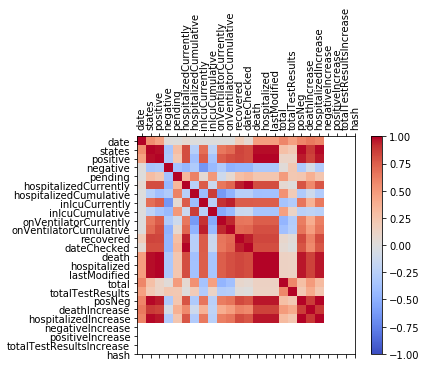

In [11]:
corr = daily_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(daily_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(daily_data.columns)
ax.set_yticklabels(daily_data.columns)
plt.show()


In [12]:
daily_data.drop(columns=['hash','totalTestResultsIncrease','positiveIncrease','negativeIncrease','pending','hospitalizedCumulative','inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative','total','totalTestResults'])

,date,states,positive,negative,hospitalizedCurrently,recovered,dateChecked,death,hospitalized,lastModified,posNeg,deathIncrease,hospitalizedIncrease
0,2020-07-24,56,4092928,45745166,59670.000000,1.261624e+06,2020-07-24T00:00:00Z,137655.00,289355.000000,2020-07-24T00:00:00Z,49838094,1178,3026
1,2020-07-23,56,4017735,44890521,59885.000000,1.233269e+06,2020-07-23T00:00:00Z,136477.00,286329.000000,2020-07-23T00:00:00Z,48908256,1039,2500
2,2020-07-22,56,3946708,44137149,59675.000000,1.210849e+06,2020-07-22T00:00:00Z,135438.00,283829.000000,2020-07-22T00:00:00Z,48083857,1117,2248
3,2020-07-21,56,3877558,43410797,59362.000000,1.182931e+06,2020-07-21T00:00:00Z,134321.00,281581.000000,2020-07-21T00:00:00Z,47288355,1038,2551
4,2020-07-20,56,3813916,42724191,58371.000000,1.160087e+06,2020-07-20T00:00:00Z,133283.00,279030.000000,2020-07-20T00:00:00Z,46538107,362,1647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2020-01-26,1,2,0,39184.607692,4.569312e+05,2020-01-26T00:00:00Z,65687.34,146604.993007,2020-01-26T00:00:00Z,2,0,0
181,2020-01-25,1,2,0,39184.607692,4.569312e+05,2020-01-25T00:00:00Z,65687.34,146604.993007,2020-01-25T00:00:00Z,2,0,0
182,2020-01-24,1,2,0,39184.607692,4.569312e+05,2020-01-24T00:00:00Z,65687.34,146604.993007,2020-01-24T00:00:00Z,2,0,0
183,2020-01-23,1,2,0,39184.607692,4.569312e+05,2020-01-23T00:00:00Z,65687.34,146604.993007,2020-01-23T00:00:00Z,2,0,0


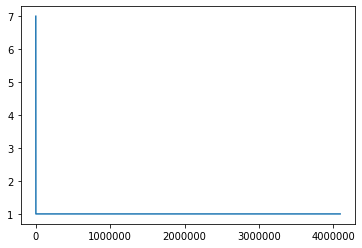

In [43]:
daily_data['positive'].value_counts().sort_index().plot.line()

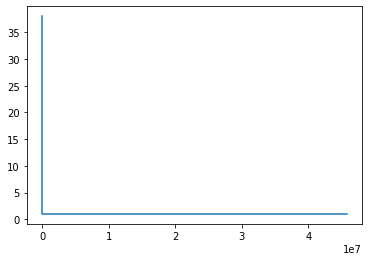

In [42]:
daily_data['negative'].value_counts().sort_index().plot.line()




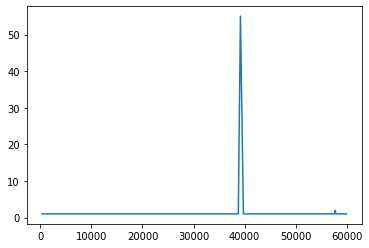

In [41]:
daily_data['hospitalizedCurrently'].value_counts().sort_index().plot.line()

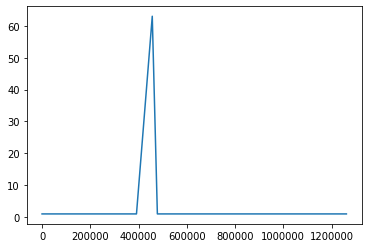

In [40]:
daily_data['recovered'].value_counts().sort_index().plot.line()

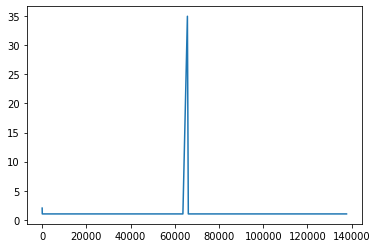

In [39]:
daily_data['death'].value_counts().sort_index().plot.line()

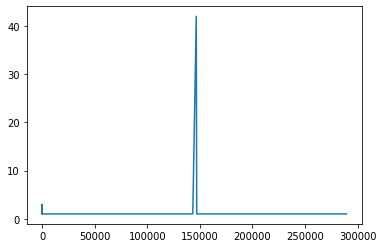

In [38]:
daily_data['hospitalized'].value_counts().sort_index().plot.line()

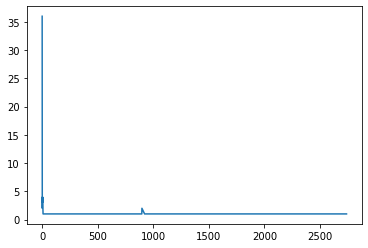

In [37]:
daily_data['deathIncrease'].value_counts().sort_index().plot.line()

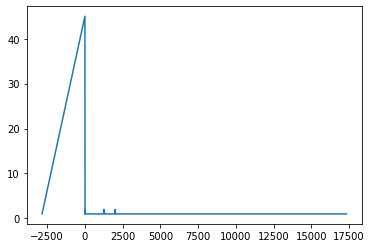

In [36]:
daily_data['hospitalizedIncrease'].value_counts().sort_index().plot.line()